## Distributions and outliers

The probability distribution $P$ is a function over the random variable $X$, which assigns a probability to each possible value of the variable - a value in the interval $[0,1]$. The variable $X$ can be continuous, discrete, one- or multi- dimensional.

The value of $P(X)$ is for each possible value of the variable $X$ (the entire definition range), and the sum over the definition range must be the same as $1$.

For each probability distribution that we will learn below, we give:
* the definition area (i.e., what is the $X$);
* form (a formula that assigns a probability to each value of $X$),
* parameters (constants that determine the values ​​and / or the shape of the function)

**Guide:** *The choice of the distribution to model depends on the nature of the data.*

In [ ]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
plt.style.use('../PR.mplstyle')
import numpy as np
np.random.seed(42)

## Gaussian (normal) distribution

The normal (or Gaussian) distribution is the distribution over the whole range of real numbers. It is one of the most common distributions, which is used in practice, since a lot of data is bell-shaped. The function is *symmetric* and is given by two parameters, the mean and the variance.

**Variable type:** one- or multi- dimensional, continuous.

**Definition range:** $(-\infty, +\infty)$

**Format:**
    $$ P(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x - \mu)^2}{2 \sigma ^2}}$$

**Parameters:**
* $\mu$ middle/hope
* $\sigma^2$ varianca

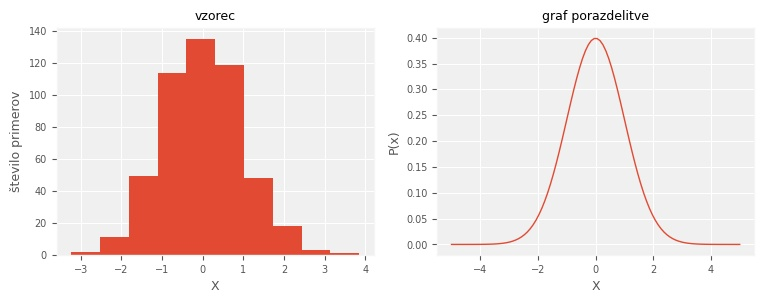

In [2]:
from scipy.stats import multivariate_normal as mvn 

# Parametri določajo obliko funkcije
mu     = 0   # sredina
sigma2 = 1   # varianca

n = 500  # velikost vzorca
sample = mvn.rvs(mu, sigma2, size=n)  # naključen vzorec n primerov

xr = np.linspace(-5, 5, 100)               # interval X 
P  = [mvn.pdf(x, mu, sigma2) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

### Learning the parameters

In practice, we do not know the real values ​​of the parameters. *Parameters are learned from the sample*. The advantage of the process is that we can then conclude on new samples, i.e., each possible value of the variable is determined by the probability.

We have a sample of random variable $X$ of size $n$.
$$ {X_1, X_2, ..., X_n} $$

For a normal distribution, we get the *estimate* for the parameters as follows:

$\mu = E[X_i] = \bar{X}$

$\sigma^2 = \frac{n-1}{n} E[(X_i-\bar{X})^2] = \frac{n-1}{n} var[x]$

The $\mu$ value is the average of the sample. The $\sigma^2$ value is the corrected variance of the sample.

We estimate the parameters from the sample:

In [3]:
mu_fit = np.mean(sample)
sigma2_fit = (n-1)/n * np.var(sample)

mu_fit, sigma2_fit

(0.006837994588647575, 0.9590103551480912)

The estimated values ​​of the parameters are similar to the real values ​​($\mu = 0$, $\sigma^2 = 1$).

In one picture we compare the distribution with the learned parameters with the correct distribution:

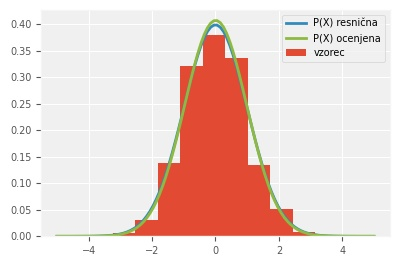

In [4]:
P_fit = [mvn.pdf(x, mu_fit, sigma2_fit) for x in xr]

plt.figure()
plt.hist(sample,    label="vzorec", density=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)  
plt.legend();

##### Question 4-1-1

Check how the accuracy of the parameter estimation changes with the size $n$ of the sample.

[Answer](204-1.ipynb#Answer-4-1-1)

## Student's distribution

Student's distribution (or t-distribution) is the distribution over the entire range of real numbers. Its shape is symmetrical and similar to normal distribution. It is less sensitive to *outliers in small samples*.


**Variable type:** one-dimensional, continuous.

**Definition range:** $x \in (-\infty, +\infty)$

**Format:**
    $$ P(x) = \frac{\Gamma[(\nu + 1) / 2]}{\sqrt{\nu \pi} \, \Gamma(\nu / 2)} \left( 1 + \frac{x^2}{\nu} \right)^{-(\nu + 1) / 2}$$

**Parameters:**
* $\nu$ number of degrees of freedom

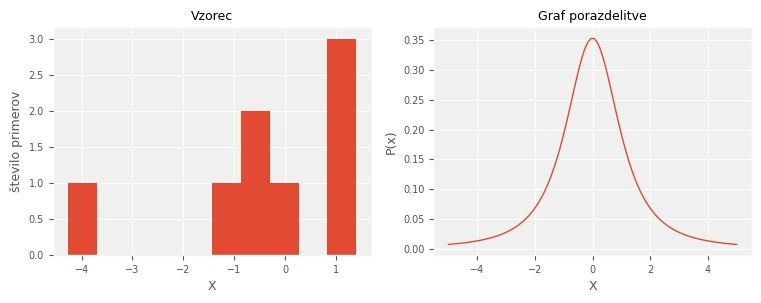

In [5]:
from scipy.stats import t as student 

# Parametri določajo obliko funkcije
nu = 2 # prostostne stopnje

n = 8  # velikost vzorca
sample = student.rvs(nu, size=n)  # naključen vzorec n primerov spremenljivke

xr = np.linspace(-5, 5, 100)  # interval X 
P  = [student.pdf(x, nu) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

### Learning the parameters from the sample

Most distributions in the `scipy` library contain a `fit` function, which calculates the most likely values of the distribution parameters relative to the sample.

In one picture we compare the distribution with the learned parameters with the correct distribution

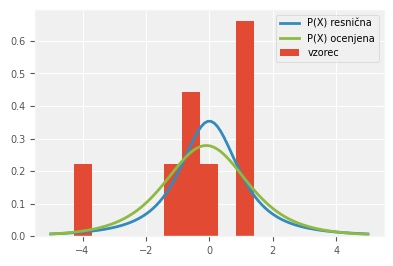

In [6]:
pars = student.fit(sample)
P_fit = [student.pdf(x, *pars) for x in xr ]

plt.figure()
plt.hist(sample,    label="vzorec", density=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)
plt.legend();

##### Question 4-1-2

Generate a sample with a small number (up to 20) of samples from normal distribution. Compare distribution estimates by means of normal and Student's distribution. Which distribution better evaluates the true distribution?

In [7]:
# Primerjaj Normalno in Studentovo porazdelitev pri majhnem vzorcu
# ...

[Answer](204-1.ipynb#Answer-4-1-2)

##  Beta Distribution

The beta distribution is the distribution of the variable in the *limited interval* $[0, 1]$. Its shape is very flexible, it can have one or two *maximums*. The distribution can be translated to any interval $[a, b]$ with summation (translation) and multiplying (spreading/narrowing) of the interval.

**Variable type:** $x$, one-dimensional, continuous, on a limited interval.

**Definition range:** $x \in [0, 1]$

**Format:**
    $$ P(x) = \frac{1}{\mathrm{B}(\alpha,\beta)}\, x ^{\alpha-1}(1-x)^{\beta-1}$$

**Parameters:**
* $a$
* $b$

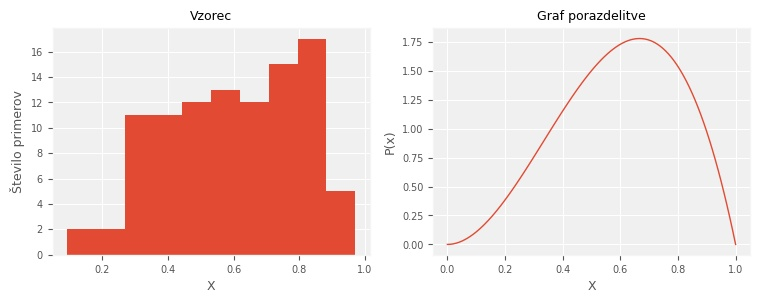

In [8]:
from scipy.stats import beta

# Parametri določajo obliko funkcije
a, b = (3, 2)    # parametra a, b

n = 100                            # velikost vzorca
sample = beta.rvs(a, b, size=n)        # naključen vzorec n primerov spremenljivke

xr = np.linspace(0, 1, 100)               # interval X 
P  = [beta.pdf(x, a, b) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("Število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

##### Question 4-1-3

Change the parameters $a$ and $b$. How does the shape of the function change?

[Answer](204-1.ipynb#Answer-4-1-3)

### Learning the parameters from the sample
We use the `fit` function also to learn the Beta distribution parameters.

In one picture we compare the distribution with the learned parameters with the correct distribution.

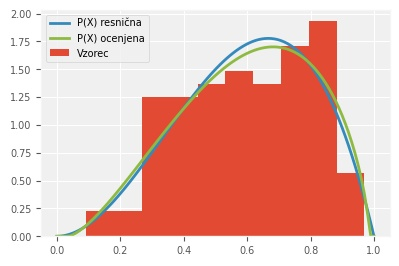

In [9]:
parameters = beta.fit(sample)
P_fit = [beta.pdf(x, *parameters) for x in xr ]

plt.figure()
plt.hist(sample,    label="Vzorec", density=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)   # ocenjena porazdelitev je model
plt.legend();

##### Question 4-1-4

Change the parameters $a$ and $b$ and the size $n$ of the sample. How does the quality of the fitting change?

[Answer](204-1.ipynb#Answer-4-1-4)